In [2]:
import deeplabcut

config_path = deeplabcut.create_new_project(
    'FESFatigue', 
    'Jake', 
    ['/home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/videos/fatiguetest0523ecrb12_2.mp4'], 
    working_directory='/home/jakejoseph/Desktop/Joseph_Code/', 
    copy_videos=True, 
    multianimal=False
)


2024-05-31 12:50:17.922399: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 12:50:17.998847: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-31 12:50:18.001861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2024-05-31 12:50:18.001870: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ign

Loading DLC 2.3.9...


/home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Project "/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31" already exists!


In [6]:
import deeplabcut
# config_path = '/home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/config.yaml'
deeplabcut.extract_frames(config_path, mode='automatic', algo='kmeans', userfeedback=False, crop=True)

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 445.57  seconds.
Extracting and downsampling... 13367  frames from the video.


13367it [01:58, 112.40it/s]


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


In [9]:
deeplabcut.label_frames(config_path)

In [10]:
deeplabcut.create_training_dataset(config_path, augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([ 9,  7, 18, 19, 12, 14,  4,  8, 13, 11,  1,  3,  6, 10, 17,  0, 15,
           5, 16]),
   array([2])))]

In [3]:
deeplabcut.train_network(config_path, shuffle=1, displayiters=100, saveiters=1000)

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['DIP', 'PIP', 'MCP', 'Wrist', 'Forearm'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_FESFatigueMay31/FESFatigue_Jake95shuffle1.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,


Selecting single-animal trainer
Batch Size is 1


/home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2024-05-31 12:50:23.575493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-31 12:50:23.575654: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:
2024-05-31 12:50:23.575692: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'li

Loading ImageNet-pretrained resnet_50


2024-05-31 12:50:24.199249: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Display_iters overwritten as 100
Save_iters overwritten as 1000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/dlc-models/iteration-0/FESFatigueMay31-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2], [3], [4]], 'all_joints_names': ['DI

iteration: 100 loss: 0.0558 lr: 0.005
iteration: 200 loss: 0.0184 lr: 0.005
iteration: 300 loss: 0.0167 lr: 0.005


Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['DIP', 'PIP', 'MCP', 'Wrist', 'Forearm'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_FESNewCameraApr19/FESNewCamera_Jake95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 5,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 'shuffle': True,
 'snapsho

Running  DLC_resnet50_FESNewCameraApr19shuffle1_50000  with # of training iterations: 50000
Running evaluation ...


20it [00:19,  1.03it/s]
/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/pose_estimation_tensorflow/core/evaluate.py:930: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  DataMachine.to_hdf(resultsfilename, "df_with_missing")


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-50000
Results for 50000  training iterations: 95 1 train error: 2.36 pixels. Test error: 28.35  pixels.
With pcutoff of 0.6  train error: 2.36 pixels. Test error: 33.95 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


  0%|          | 0/20 [00:00<?, ?it/s]/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/utils/visualization.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DataCombined[loopscorer][bp]["y"][imagenr]
/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/utils/visualization.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + DataCombined[loopscorer][bp]["x"][imagenr]
/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/utils/visualization.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


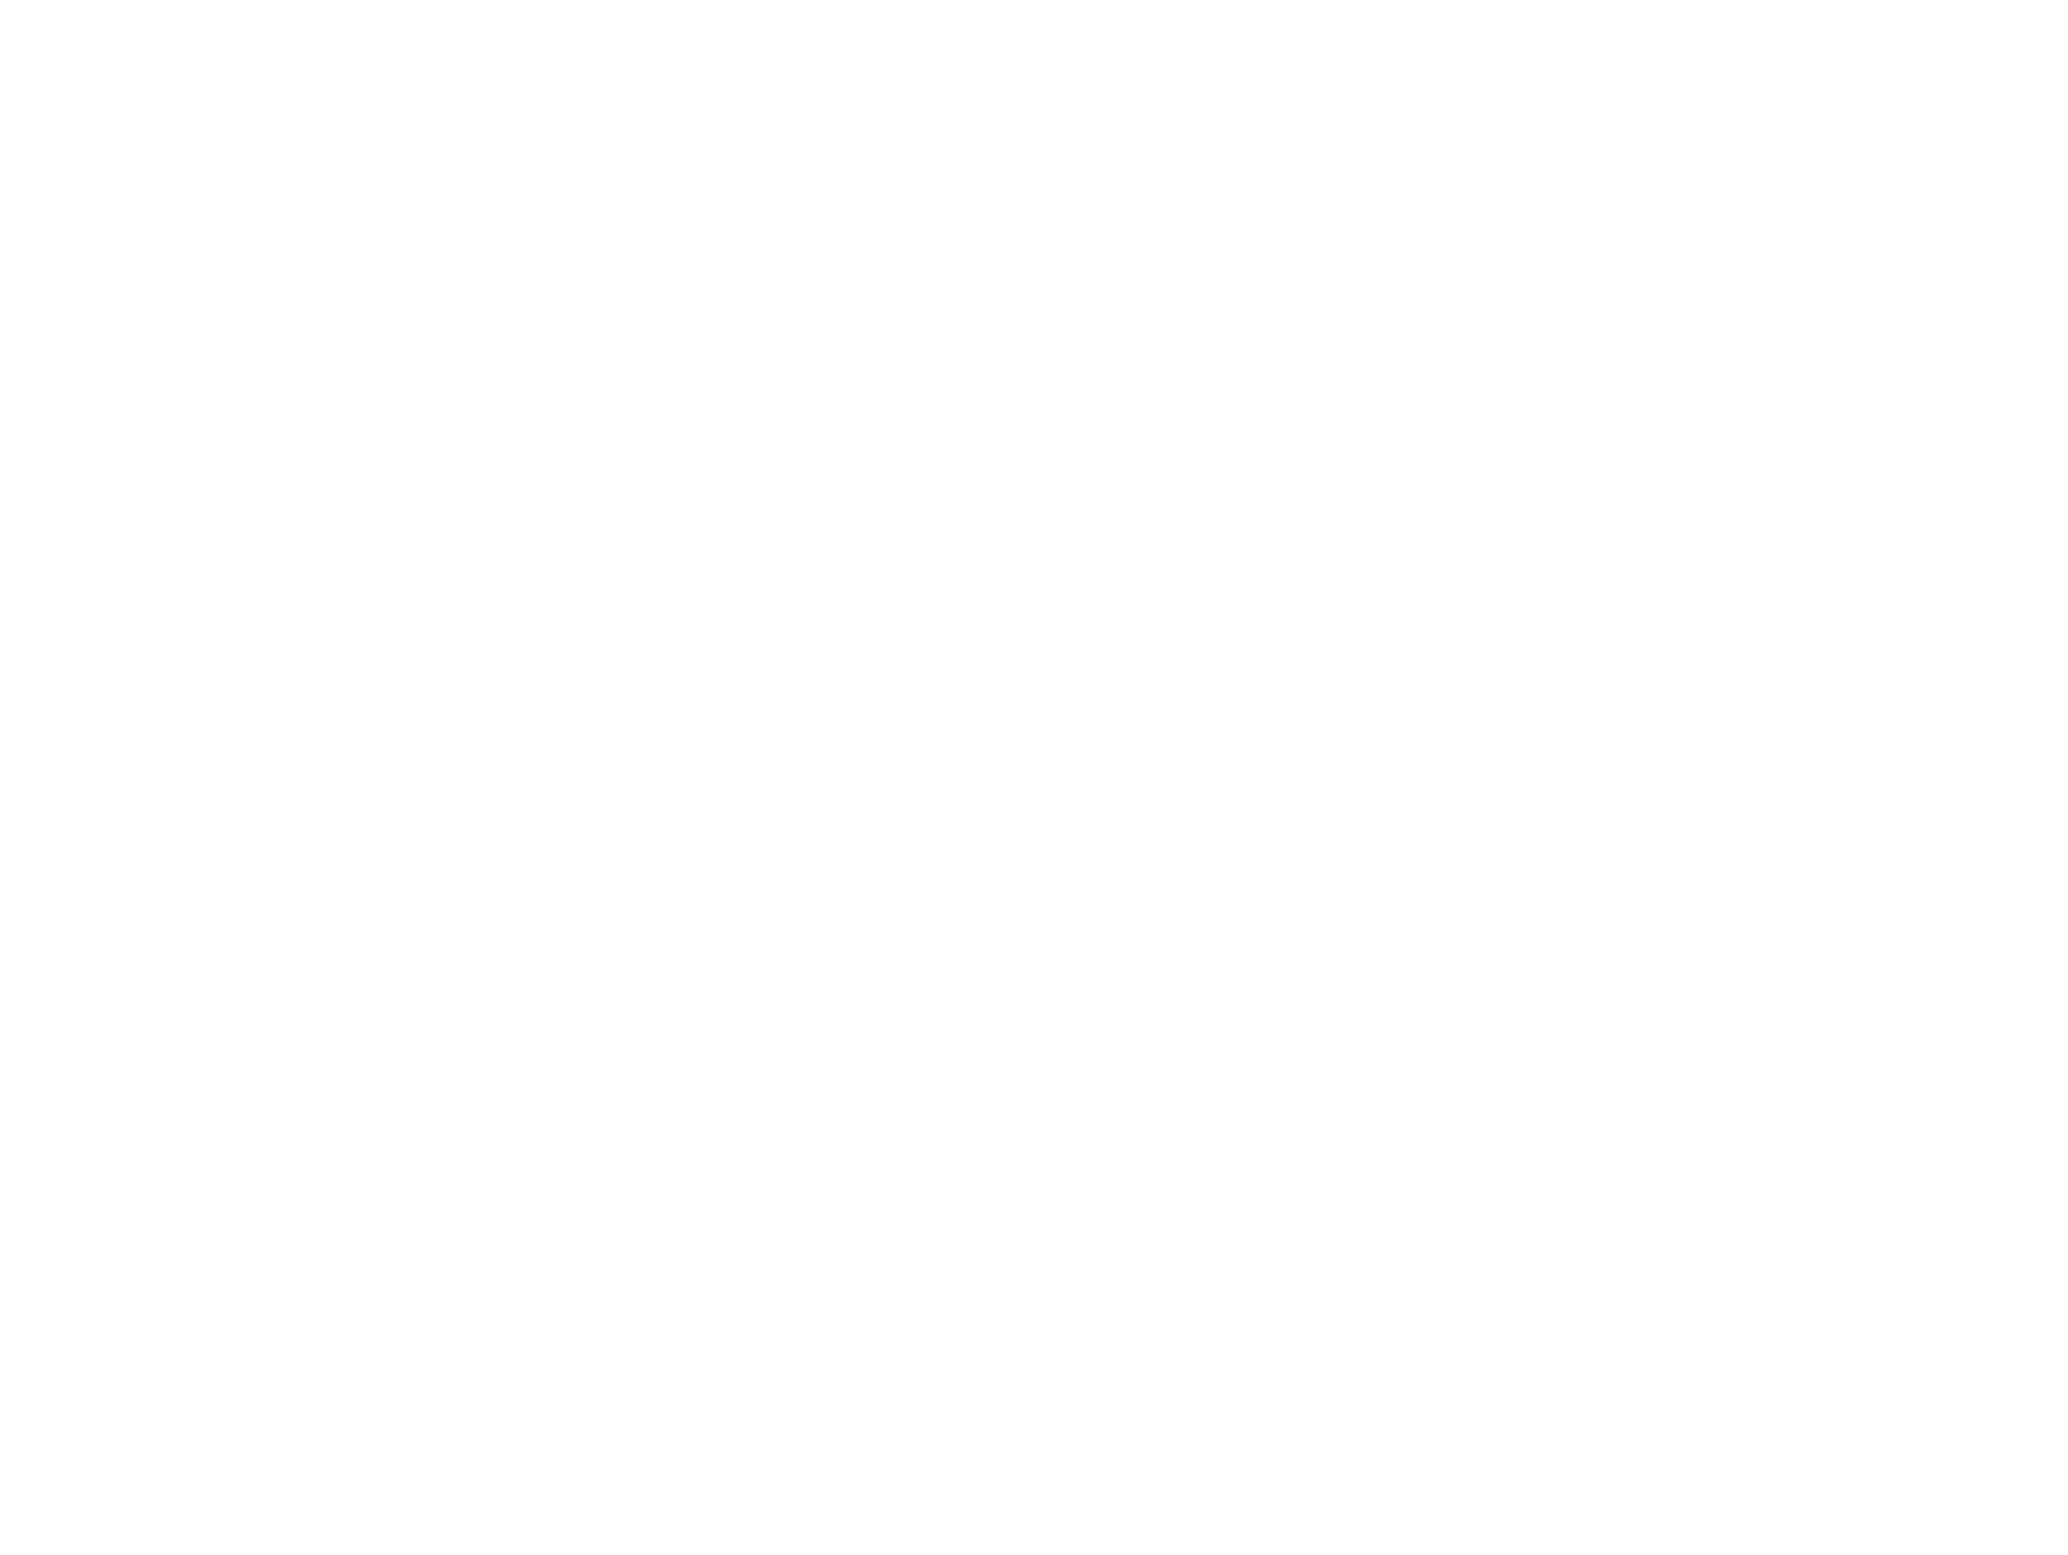

In [4]:
deeplabcut.evaluate_network(config_path,Shuffles=[1], plotting=True)

In [14]:
video = '/home/jakejoseph/Desktop/Joseph_Code/FESNewCamera-Jake-2024-04-19/videos/Individual Motor Points top 03-05.mp4'
# deeplabcut.analyze_videos(config_path, video, shuffle=1, save_as_csv=True, videotype='mp4')
deeplabcut.extract_outlier_frames(config_path, video,outlieralgorithm='uncertain',p_bound=0.05)

Method  uncertain  found  2485  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.


Frames from video Individual Motor Points top 03-05  already extracted (more will be added)!
Loading video...
Cropping coords: None
Duration of video [s]:  2355.866666666667 , recorded @  30.0 fps!
Overall # of frames:  70676 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 2355.87  seconds.
Extracting and downsampling... 2484  frames from the video.


2484it [08:17,  4.99it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [14844, 52819, 41071, 7243, 67137, 28069, 50287, 52886, 17108, 46484, 50570, 59482, 25261, 41510, 67199, 40373, 67495, 27807, 68477, 39969]
Attempting to create a symbolic link of the video ...
Video /home/jakejoseph/Desktop/Joseph_Code/FESNewCamera-Jake-2024-04-19/videos/Individual Motor Points top 03-05.mp4 already exists. Skipping...
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\Individual Motor Points top 03-05.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


In [2]:
video = '/home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/videos/fatiguetest0523ecrb12_2.mp4'
deeplabcut.analyze_videos(config_path, video, shuffle=1, save_as_csv=True, videotype='mp4')
deeplabcut.create_labeled_video(config_path, video, videotype = 'mp4', save_frames=False)

Using snapshot-33000 for model /home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/dlc-models/iteration-0/FESNewCameraclipsMay5-trainset95shuffle1


/home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2024-05-28 15:07:59.583963: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-28 15:07:59.584113: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:
2024-05-28 15:07:59.584192: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'li

Starting to analyze %  /home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/videos/fatiguetest0523ecrb12_2.mp4
Loading  /home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/videos/fatiguetest0523ecrb12_2.mp4
Duration of video [s]:  445.57 , recorded with  30.0 fps!
Overall # of frames:  13367  found with (before cropping) frame dimensions:  2048 1536
Starting to extract posture


100%|██████████| 13367/13367 [3:24:14<00:00,  1.09it/s] 
/home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/deeplabcut/utils/auxiliaryfunctions.py:402: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  DataMachine.to_hdf(dataname, "df_with_missing", format="table", mode="w")


Saving results in /home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Starting to process video: /home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/videos/fatiguetest0523ecrb12_2.mp4
Loading /home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/videos/fatiguetest0523ecrb12_2.mp4 and data.
Duration of video [s]: 445.57, recorded with 30.0 fps!
Overall # of frames: 13367 with cropped frame dimensions: 2048 1536
Generating frames and creating video.


100%|██████████| 13367/13367 [02:42<00:00, 82.02it/s]


[True]

In [15]:
deeplabcut.refine_labels(config_path)

In [17]:
# deeplabcut.merge_datasets(config_path)
deeplabcut.create_training_dataset(config_path, net_type='resnet_50', augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([29, 21,  4, 31, 25,  7, 32, 18, 30, 27, 20,  2, 19,  0, 14,  8, 26,
          11,  1,  3, 10, 16, 34,  6, 22, 37, 12, 33, 17,  9, 23, 13, 15,  5,
          36, 28]),
   array([35, 24])))]